In [44]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal


In [ ]:
class IterativeState(TypedDict):
    input: str
    length: int
    output: str
    approved:Literal["yes","no"]
    current_step: int
    max_steps: int

def get_length(state: IterativeState):
    return {"length": len(state["input"])}

def evaluate(state: IterativeState):
    if state["length"] < 10 and state["current_step"] < state["max_steps"]:
        return {"approved":"no"}
    else:
        return {"approved":"yes"}
        
def route_next_step(state: IterativeState)->Literal["increase_size","within_limit"]:
    if state["approved"] == "no":
        return "increase_size"
    else:
        return "within_limit"

def increase_size(state: IterativeState):
    new_input = state["input"] + "*"
    new_step = state["current_step"] + 1
    new_length = len(new_input)    

    return {"input": new_input, "current_step": new_step, "length": new_length}



In [46]:
graph=StateGraph(IterativeState)

graph.add_node("get_length",get_length)
graph.add_node("evaluate",evaluate)
graph.add_node("increase_size",increase_size)

graph.add_edge(START,"get_length")
graph.add_edge("get_length","evaluate")
graph.add_conditional_edges("evaluate",route_next_step,{"increase_size":"increase_size","within_limit":END})
graph.add_edge("increase_size","evaluate")

workflow=graph.compile()


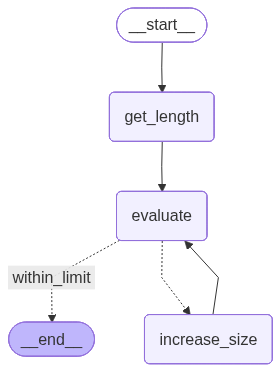

In [47]:
workflow

In [49]:
initial_state={
    "input":"HELLO",
    "current_step": 1,
    "max_steps":5
}

final_state=workflow.invoke(initial_state)
final_state

{'input': 'HELLO****',
 'length': 9,
 'approved': 'yes',
 'current_step': 5,
 'max_steps': 5}